In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
# first data model linear regression

#load the modules for linear regression.
from sklearn.linear_model import LinearRegression

#create a object lm
lm = LinearRegression()  #note the capital letters
lm


LinearRegression()

In [6]:
#lets answer the question abt highway=mpg predicts car price.
X = df[['highway-mpg']]
Y = df[['price']]

#use X Y to fit linear model

lm.fit(X,Y)

LinearRegression()

In [8]:
ypre = lm.predict(X)  #ussX to predict Y
ypre[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [9]:
ypre[0:10]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508],
       [17879.97140011],
       [17879.97140011],
       [17879.97140011],
       [21988.63829172],
       [14593.03788682]])

In [10]:
# values of slope

lm.intercept_

lm.coef_

array([[-821.73337832]])

In [11]:
lm.intercept_     #value of intercept

array([38423.30585816])

In [ ]:
#the linear model is  price=38423-821*highway-mpg

In [12]:
#second model multiple linear with more than one predictor variables.

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z,df['price'])  #why single[] not double??

LinearRegression()

In [13]:
lm.intercept_

-15806.624626329198

In [14]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [15]:
#  Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

# import visualization package to evaluate which of those 2 models is better.
import seaborn as sns
%matplotlib inline 

(0.0, 48161.45625378948)

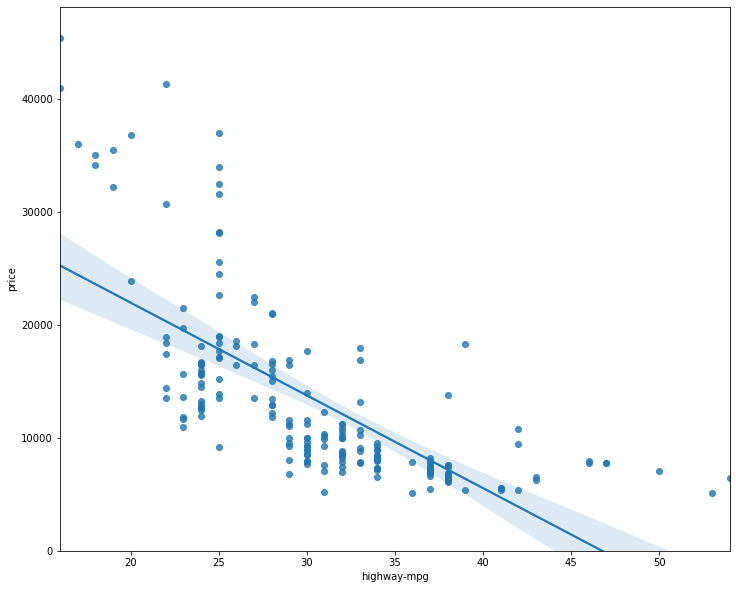

In [16]:
width = 12
height = 10
plt.figure(figsize=(width, height))

sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [17]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


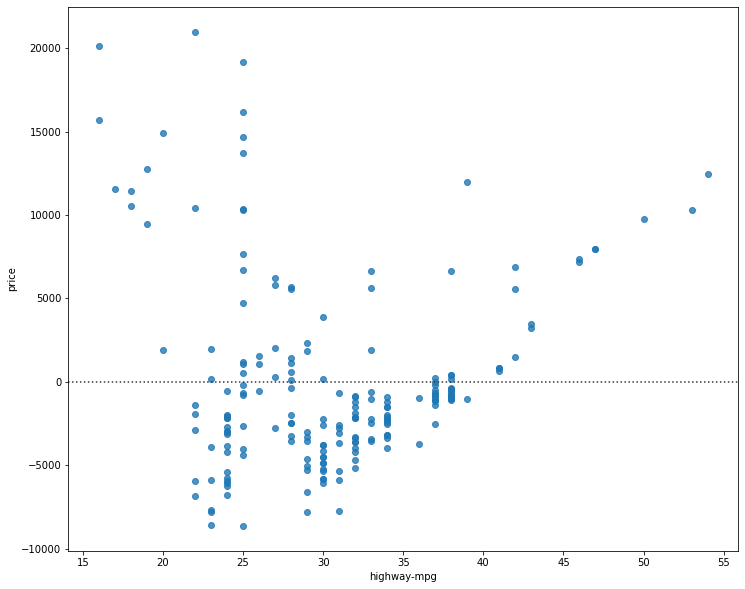

In [18]:
#highway-mpg correlation with price is -.7 compares to peak&price -0.1
#correlation btw highway and price is much more stronger.

#another plot -residual-the difference btw actual y values and predicted y values.
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

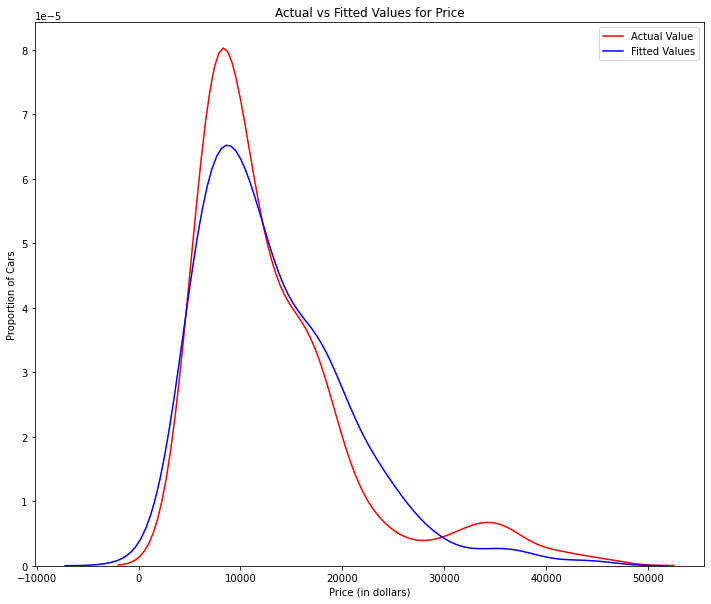

In [19]:
# the residuals are not randomly spread around the x-axis, which
#leads us to believe that maybe a non-linear model is more appropriate

#with multi linear regression we cannot use the above plots. Use distribution plot.

Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [20]:
#reasonably close based on the area of overlap.


In [21]:
#before we decided a linear regression is not ideal for highwaympg and price. Now we try polynomial.

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    
x = df['highway-mpg']
y = df['price']    

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


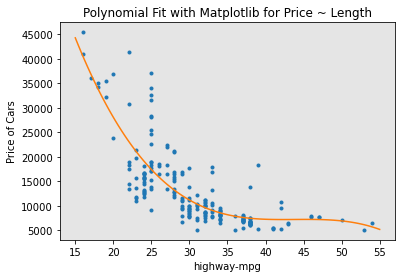

In [22]:
PlotPolly(p, x, y, 'highway-mpg')


In [23]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [24]:
#this model performs better than out17.

#when a polynomial has multi deimensions ex.𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋1𝑋2+𝑏4X1^2
# we have to transform the features.
from sklearn.preprocessing import PolynomialFeatures


In [25]:
#trying creating a pipeline to simplif the steps of processing data.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [26]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [27]:
#normalize the data, perform a transform and fit/prodce the prediction
#the model simultaneously

pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [28]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [29]:
#so we have visualize our model evaluations, now we want quantitative measures to determine the accuracy of the models.
#R^2  MSE

#R square measures how close the data is to the fitted regression line.
#MSE measures the difference btw actual values of y and estimated y.

#first measure the simple lniear regression we fitted earlier.
lm.fit(X,Y)
print ('the R-square is: ',lm.score(X，Y))

SyntaxError: invalid character in identifier (<ipython-input-29-c1734c7fc865>, line 9)

In [30]:
lm.fit(X,Y)
print('the R-square is: ',lm.score(X,Y))

the R-square is:  0.4965911884339175


In [31]:
#R square measures how close the data is to the fitted regression
#We can say that ~ 49.6% of the variation (price) is explained by this simple linear model "highway_fit".
#result is not very high. Not optimal.

#Now we do MSE. Obtain some predicted valus.
yhat=lm.predict(X)
print('the output of first 4 values: ', yhat[0:4])

the output of first 4 values:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [33]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['price'], yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


In [34]:
#more multi linear model:

# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [35]:
Y_predict_multifit = lm.predict(Z)

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [37]:
#more polynomial model:

from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)


The R-square value is:  0.674194666390652


In [38]:
mean_squared_error(df['price'], p(x))

20474146.426361218

In [ ]:
#since r-square meansures how close the data is to the line,
#higher the r-square, the closer it is. Higher is better.

#MSE measures the difference, so we want smaller MSE.
#Conclusion: multi linear regrssion model has higher r square and smaller MSE.
#MLR.